## Множественная регрессия
Построить регрессионную модель спрогнозировать число сданных в аренду велосипедов с использованием
множественной регрессии. Ввести граничное значение (экономически выгодное значение числа сданных в
аренду) для велосипедов и ввести дополнительную колонку (колонку класса) означающую эффективность или
нет (1 или 0). Построить модель классификации для предсказания дней эффективной работы. Сравнить качество
моделей предсказания дней эффективной работы (модели регрессии и классификации)
## Данные
• DataSet 5_2 - Данные об аренде велосипедов

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('DataSet5_2.csv')
data2 = data.sort_values(by='count').reset_index()

start_idx = 0
end_idx = len(data)

n = round(0.8*(end_idx-start_idx))

train = data[0:n]
test = data[n:]

train_x = train.drop(['count'], axis=1, inplace=False)
train_y = train['count']
test_x = test.drop(['count'], axis=1, inplace=False)
test_y = test['count']

## Регрессионная модель

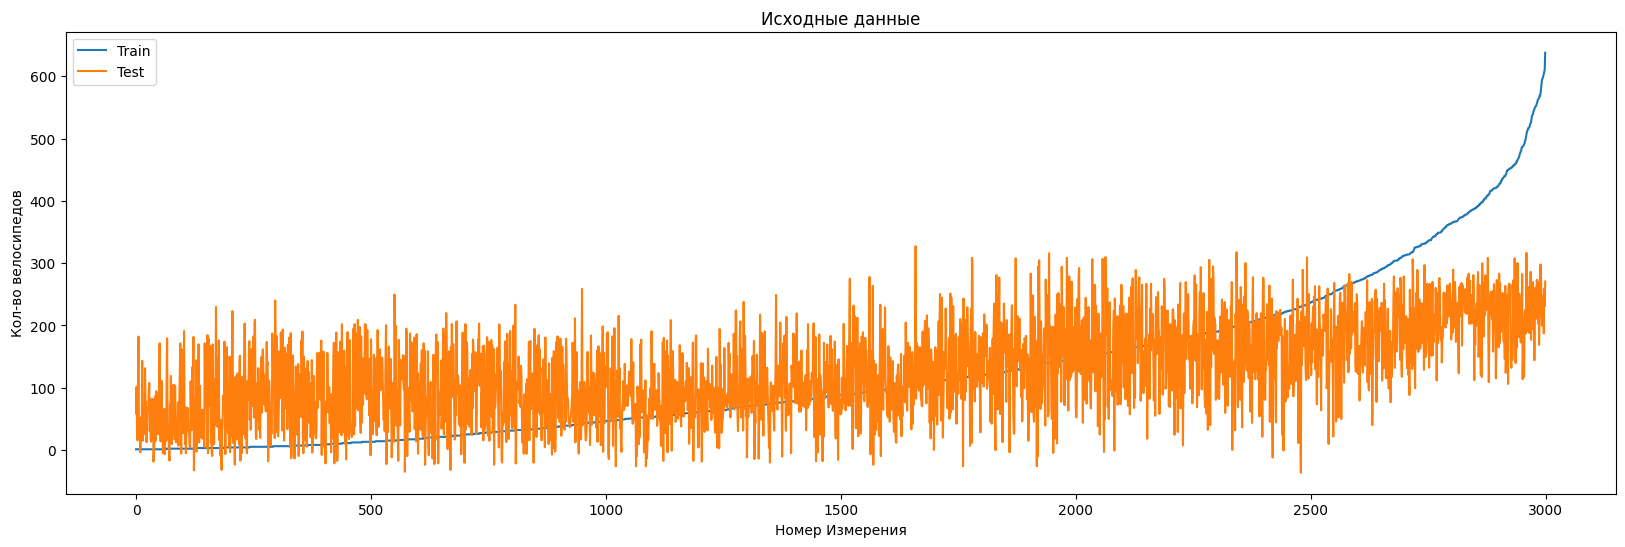

In [31]:
from scipy.optimize import curve_fit

def mapping_func(x,a,b,c,d,e,i,j):
    return a + b * x['holiday'] + c * x['humidity'] + d*x['summer'] + e*x['temp'] + i*x['windspeed'] + j*x['workingday']
    
args,covar = curve_fit(mapping_func, train_x, train_y)

a,b,c,d,e,i,j = args[0], args[1], args[2], args[3], args[4], args[5], args[6]

res_y_tr = a + b*train['holiday'] + c*train['humidity'] + d*train['summer'] + e*train['temp'] + i*train['windspeed'] + j*train['workingday']
res_y_ts = a + b*test['holiday'] + c*test['humidity'] + d*test['summer'] + e*test['temp'] + i*test['windspeed'] + j*test['workingday']

res_y = list(res_y_tr)+list(res_y_ts)

test_x2 = data2.copy()  # Create a copy of data2
test_x2.drop(['count'], axis=1, inplace=True)  # Drop 'count' column from the copied DataFrame

res_y_ts2 = a + b*test_x2['holiday'] + c*test_x2['humidity'] + d*test_x2['summer'] + e*test_x2['temp'] + i*test_x2['windspeed'] + j*test_x2['workingday']

fig, ax = plt.subplots(figsize=(20,6))

ax.plot(data2['count'].index, data2['count'])
ax.plot(data2['count'].index, res_y_ts2)
ax.set(title="Исходные данные", xlabel="Номер Измерения", ylabel="Кол-во велосипедов")
ax.legend(['Train', 'Test'])
# ax.plot(data2['count'].index, data2['count'])

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

res1 = pd.DataFrame()
res2 = pd.DataFrame()

# поиск выгодных категорий бинарно которые больше 100 или меньше
res1 = [1 if data['count'][i]>100 else 0 for i in range(len(data))]
res2 = [1 if res_y[i]>100 else 0 for i in range(len(res_y))]

precision = round(precision_score(res1,res2)*100,2)
recall = round(recall_score(res1, res2)*100,2)
accuracy = round(recall_score(res1, res2)*100,2)
f1 = round(f1_score(res1, res2)*100,2)
roc_auc = round(roc_auc_score(res1, res2)*100,2)

print('precision: ', precision)
print('recall: ', recall)
print('accuracy: ', accuracy)
print('f1: ', f1)
print('roc_auc: ', roc_auc)
# оценку качества бинарной классификации с использованием различных метрик,

precision:  65.29
recall:  84.22
accuracy:  84.22
f1:  73.56
roc_auc:  73.32


## Классификация

In [36]:
from sklearn.neighbors import KNeighborsClassifier

data_cl = data
data_cl['cls'] = [1 if data['count'][i]>100 else 0 for i in range(len(data))]

train_cl_x = data_cl.drop(['cls'], axis=1, inplace=False)[0:n]
train_cl_y = data_cl['cls'][0:n]

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_cl_x, train_cl_y)
res_y_cl = neigh.predict(data_cl.drop(['cls'], axis=1, inplace=False))

precision = round(precision_score(data_cl['cls'], res_y_cl)*100,2)
recall = round(recall_score(data_cl['cls'], res_y_cl)*100,2)
accuracy = round(recall_score(data_cl['cls'], res_y_cl)*100,2)
f1 = round(f1_score(data_cl['cls'], res_y_cl)*100,2)
roc_auc = round(roc_auc_score(data_cl['cls'], res_y_cl)*100,2)

print('precision: ', precision)
print('recall: ', recall)
print('accuracy: ', accuracy)
print('f1: ', f1)
print('roc_auc: ', roc_auc)

precision:  99.27
recall:  99.34
accuracy:  99.34
f1:  99.31
roc_auc:  99.36
